### Compare word frequencies between two works of a single author.

Author : Anatole France 
Titles : Penguin Island (1908) and Honey-Bee (1911) 

In [40]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ,'', 'Gutenberg', 'gutenberg-tm','â\x80\x9ci']

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    

(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/files/1930/1930-0.txt')   # Penguin Island By: Anatole France
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/files/25405/25405-0.txt') # Honey Bee By: Anatole France

### Plot the results of two books for the same author

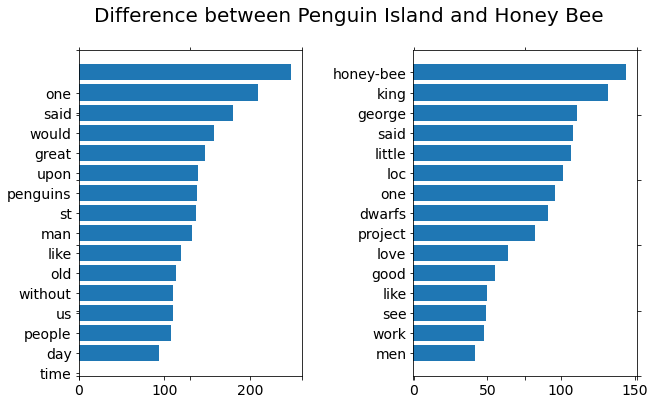

In [41]:

import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos-1, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_ee, wf_bu, 'Difference between Penguin Island and Honey Bee')
# print ("word frequency of Penguin Island : ",wf_ee)
# print ("word frequency of Honey Bee: ",wf_bu)

### Plot the results of two different authors 

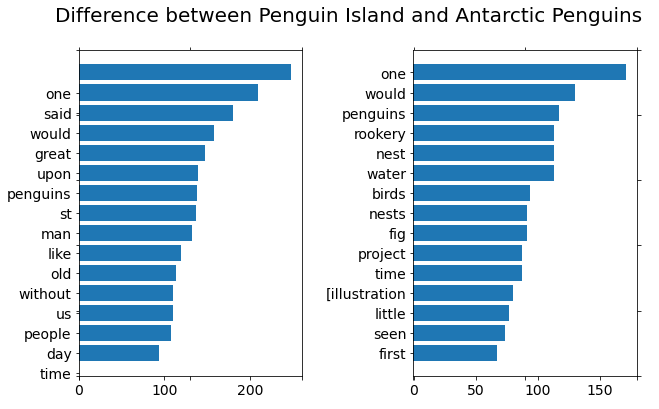

In [42]:
(wf_ap, tw_ap) = get_wf('https://www.gutenberg.org/files/36922/36922-8.txt') # Antarctic Penguins By: George Murray Levick
plotTwoLists (wf_ee, wf_ap, 'Difference between Penguin Island and Antarctic Penguins')
# printing the most frequent words for debugging 
# print ("word frequency of Penguin Island : ",wf_ee)
# print ("word frequency of  Antarctic Penguins: ",wf_ap)

# Project Analysis
### What is the question?
    - Does the same author use one or more words frequently in his/her writings?
    - Is the title name represent the most frequent word in the book?

### What was the approach?
    - Comparing the most frequent words of two books for the same author
    - Comparing the most frequent words of two books for different authors
    
### What problems did I encounter?
    - Plotting alignment issue 
    
### What results did I get?
    - The two books of the same author have different frequent words
    - The two books of the different authors and almost same topic have the same most frequent word (one), but  not the title word!
    
### What new ideas did this generate?
    - How to perform analytical thinking.
    - The book title words do not have to be used alot in the text.